# Задачи


1. Посчитайте среднее количество показов и среднее количество кликов на объявления за весь период (округлите до целых).


2. Нарисуйте график распределения показов на объявление за весь период.


3. Посчитайте скользящее среднее показов с окном 2. Какое значение скользящего среднего получим за 6 апреля 2019 года (ответ округлите до целых)?


4. Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения арифметического среднего по дням и скользящего среднего количества показов. В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем. 
*Напишите функцию, которая найдет проблемное объявление (с наибольшим/наименьшим количеством показов) в день, в который была замечена самая большая по модулю аномалия. 

5. Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом.


6. Вычислите конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней. Ответ дайте в процентах и округлите до сотых. (Фильтровать нужно по значению в формате pd.Timedelta(365, unit='d'))


7. Давайте разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков для метода pd.cut – [0, 30, 90, 180, 365]

8. А теперь – выведем на интерактивный график эти категории с количеством уникальных клиентов в них.

# Описание данных

ads_data.csv – данные взаимодействий с рекламными объявлениями

1. date – дата
2. time – время
3. event – действие (просмотр/клик)
4. platform – платформа
5. ad_id – id объявления
6. client_union_id – id рекламного кабинета
7. campaign_union_id – id рекламной кампании
8. ad_cost_type – тип оплаты
9. ad_cost – цена
10. has_video – есть ли видео
11. target_audience_count – размер аудитории


ads_clients_data.csv – характеристики рекламных клиентов

1. date – дата
2. client_union_id – id рекламного кабинета
3. community_id – id сообщества
4. create_date – дата создания рекламного клиента

In [1]:
# Импортируем библиотеки

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px


In [2]:
# загружам исходные данные

ads_clients_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-evsa-22/lesson_6/ads_clients_data.csv', sep=',')
ads_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-evsa-22/lesson_6/ads_data.csv', sep=',')

In [3]:
# Смотрим на структуру данных

ads_data.head(4)
ads_clients_data.head(4)

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09


In [4]:
# Проверяем и заполняем пропуски

ads_data.isna().sum()
ads_clients_data.isna().sum()
#ads_data = ads_data.fillna(0) 

date               0
client_union_id    0
community_id       0
create_date        0
dtype: int64

In [5]:
#посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям.

df = ads_data.groupby(['ad_id','event'], as_index=False).agg({'client_union_id':'count'}).rename(columns={'client_union_id':'cnt'})
df

,ad_id,event,cnt
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1
...,...,...,...
1476,122013,view,156
1477,122023,view,68
1478,122031,click,1
1479,122031,view,138


In [6]:
# развернем таблицу, где в качестве колонок будет тип события, в качестве строк - объявления, значения - количество событий
df_pivot = df.pivot(index='ad_id', columns='event', values='cnt')
df_pivot

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,NaN,35.0
2132,1.0,58.0
...,...,...
122004,4.0,100.0
122013,NaN,156.0
122023,NaN,68.0


In [7]:
# заполняем пропцщенные значения 0
df_pivot = df_pivot.fillna(0)
df_pivot

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,0.0,35.0
2132,1.0,58.0
...,...,...
122004,4.0,100.0
122013,0.0,156.0
122023,0.0,68.0


In [8]:
# Считаем среднее количество по рекламным объявлениям
df_pivot.mean().round(0)

event
click    113.0
view     923.0
dtype: float64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


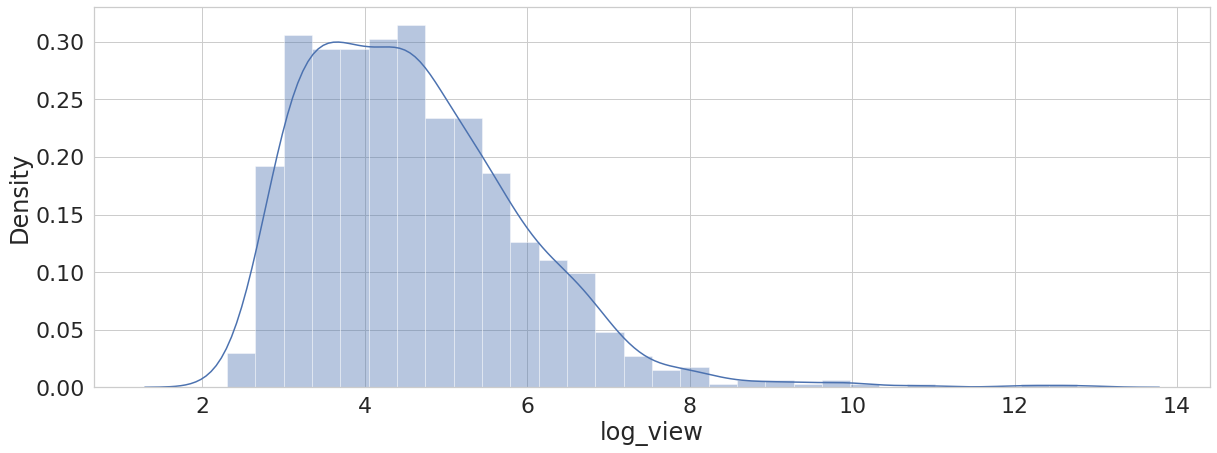

In [9]:
# Смотрим на распределение показов объявлений. По оси x – число показов. По оси y – доля объявлений с такими показами

df_for_log = ads_data.groupby(['ad_id','event'], as_index=False).agg({'client_union_id':'count'}).rename(columns={'client_union_id':'cnt'})

sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

df_for_log['log_view'] = np.log(df_for_log['cnt'])
df_view_log = df_for_log.query('event == "view"')
sns.distplot(df_view_log['log_view'])

In [10]:
#Теперь ищем среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, у которых не было показов 

ads_data_avg = ads_data.query('event == "view"').groupby(['ad_id','date'], as_index=False).agg({'client_union_id': 'count'}).rename(columns={'client_union_id':'count'})
ads_data_avg


,ad_id,date,count
0,2,2019-04-01,83
1,2,2019-04-02,18
2,3,2019-04-01,158
3,3,2019-04-02,26
4,1902,2019-04-03,34
...,...,...,...
1926,122023,2019-04-05,15
1927,122031,2019-04-05,119
1928,122031,2019-04-06,19
1929,122078,2019-04-03,36


In [11]:
#После этого считаем скользящее среднее по полученному результату с окном в 2 элемента.

ads_data_mean = ads_data_avg.groupby('date').agg({'count':'mean'})
ads_data_mean

,count
date,
2019-04-01,154.482270
2019-04-02,137.786982
2019-04-03,163.952778
2019-04-04,675.901720
2019-04-05,919.109677
2019-04-06,277.122727


In [12]:
#Вопрос: Какое значение скользящего среднего получим за 6 апреля 2019 года? Округлите ответ до целого числа.
#ads_data_mean
#ads_data_rolling

ads_data_rolling = ads_data_mean.rolling(2).mean().round(0)
ads_data_rolling

,count
date,
2019-04-01,NaN
2019-04-02,146.0
2019-04-03,151.0
2019-04-04,420.0
2019-04-05,798.0
2019-04-06,598.0


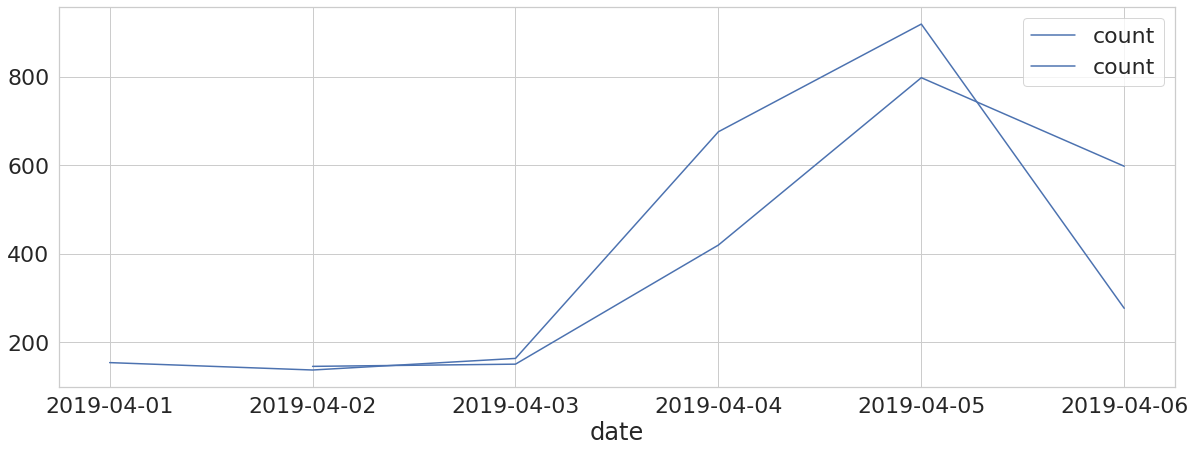

In [13]:
#нанести на один график значения просто среднего количества показов по дням и скользящего среднего на основе этих данных 

sns.lineplot(data=ads_data_mean)
sns.lineplot(data=ads_data_rolling)

In [14]:
#Посчитайте, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? 
#Дни, в которых скользящее среднее равно NaN, не учитываем. Запишите ответ в формате yyyy-MM-dd


total_result = ads_data_mean.merge(ads_data_rolling, how='inner', on='date').rename(columns={'count_x':'avg','count_y':'rolling_avg'})
total_result

,avg,rolling_avg
date,,
2019-04-01,154.482270,NaN
2019-04-02,137.786982,146.0
2019-04-03,163.952778,151.0
2019-04-04,675.901720,420.0
2019-04-05,919.109677,798.0
2019-04-06,277.122727,598.0


In [15]:
total_result['diff'] = abs(total_result.avg - total_result.rolling_avg).round(2)
total_result.sort_values(by='date', ascending=False).head(1)


,avg,rolling_avg,diff
date,,,
2019-04-06,277.122727,598.0,320.88


In [16]:
#Объедините данные рекламы с данными о рекламных клиентах  

df = ads_clients_data.merge(ads_data, on='client_union_id')
df = df.rename(columns = {'date_x':'date','create_date':'client_create_date','date_y':'date_ad'})
df

,date,client_union_id,community_id,client_create_date,date_ad,time,event,platform,ad_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:08:51,view,android,3,1,CPC,46.7,0,45035
1,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:09:36,view,ios,3,1,CPC,46.7,0,45035
2,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:30,view,ios,3,1,CPC,46.7,0,45035
3,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:58,view,android,3,1,CPC,46.7,0,45035
4,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:51:54,view,android,3,1,CPC,46.7,0,45035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 21:54:35,view,android,122078,122078,CPC,56.4,0,32354
999996,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 22:26:58,view,web,122078,122078,CPC,56.4,0,32354
999997,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 22:32:34,view,android,122078,122078,CPC,56.4,0,32354
999998,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 22:43:03,view,ios,122078,122078,CPC,56.4,0,32354


In [17]:
# смотрим типы данных в получившемся датафрейме
df.dtypes

date                      object
client_union_id            int64
community_id               int64
client_create_date        object
date_ad                   object
time                      object
event                     object
platform                  object
ad_id                      int64
campaign_union_id          int64
ad_cost_type              object
ad_cost                  float64
has_video                  int64
target_audience_count      int64
dtype: object

In [18]:
# переводим к формату даты date,date_ad, client_create_date 

df['date'] = pd.to_datetime(df['date'])
df['date_ad'] = pd.to_datetime(df['date_ad'])
df['client_create_date'] = pd.to_datetime(df['client_create_date'])

In [19]:
#найдите среднее количество дней от даты создания рекламного клиента (create_date) 
#и первым запуском рекламного объявления этим клиентом (date). В качестве ответа укажите среднее число дней.

# ищем минимальную дату create_date по каждому клиенту

min_pk_create_date = df.groupby('client_union_id', as_index=False)['client_union_id','client_create_date','date_ad'].min()
min_pk_create_date

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,client_union_id,client_create_date,date_ad
0,1,2018-12-24,2019-04-01
1,9,2018-12-10,2019-04-03
2,13,2019-01-26,2019-04-02
3,16,2018-12-19,2019-04-03
4,20,2019-03-01,2019-04-02
...,...,...,...
833,122004,2019-01-24,2019-04-01
834,122013,2018-11-04,2019-04-04
835,122023,2018-11-29,2019-04-04
836,122031,2018-12-30,2019-04-05


In [20]:
# добавляем отдельный столбец с разницей между первой датой запуска рекламы и датой регистрации рекламного кабинета                   
min_pk_create_date['gap_dates'] = min_pk_create_date.date_ad - min_pk_create_date.client_create_date #разница между датой запуска рекламы и датой создания кабинета
min_pk_create_date

,client_union_id,client_create_date,date_ad,gap_dates
0,1,2018-12-24,2019-04-01,98 days
1,9,2018-12-10,2019-04-03,114 days
2,13,2019-01-26,2019-04-02,66 days
3,16,2018-12-19,2019-04-03,105 days
4,20,2019-03-01,2019-04-02,32 days
...,...,...,...,...
833,122004,2019-01-24,2019-04-01,67 days
834,122013,2018-11-04,2019-04-04,151 days
835,122023,2018-11-29,2019-04-04,126 days
836,122031,2018-12-30,2019-04-05,96 days


In [21]:
# ищем ореднее кол-во дней между регистрацией кабинета и запуском рекламы

min_pk_create_date['gap_dates'].mean()

Timedelta('124 days 09:04:43.532219570')

In [22]:
#Давайте вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.
#кто создал, кто запустил рекламу


#объединяем таблицы
res = ads_clients_data.merge(min_pk_create_date, on='client_union_id', how='outer')
res.dtypes

#формируем переменную, где будет храниться год
year_delta = pd.Timedelta(365, unit="day")

#отбираем клиентов, у которых запуск первой рекламы произошёл не позже чем через год после регистрации + считаем их число 
clnt_with_ads_365 = res.query('gap_dates < @year_delta')['client_union_id'].shape[0]

#делим на число всех клиентов, получаем конверсию и переведим в проценты + округляем до 2-ого знака
cr = round((clnt_with_ads_365/res.shape[0])*100,2)
cr

0.69

In [38]:
#Давайте разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.
#Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней).

min_pk_create_date['intervals'] = pd.cut(min_pk_create_date['gap_dates'], pd.to_timedelta(['0d', '30d', '90d','180d', '365d']))
min_pk_create_date.groupby('intervals', as_index=False).count()

,intervals,client_union_id,client_create_date,date_ad,gap_dates
0,"(0 days 00:00:00, 30 days 00:00:00]",11,11,11,11
1,"(30 days 00:00:00, 90 days 00:00:00]",263,263,263,263
2,"(90 days 00:00:00, 180 days 00:00:00]",396,396,396,396
3,"(180 days 00:00:00, 365 days 00:00:00]",168,168,168,168


In [24]:
#постройте интерактивный барплот, 
#на котором будут показаны категории с количеством уникальных клиентов в них 
#(то, что у вас получилось на прошлом степе, по запуску первого рекламного объявления). 
#Расположите их так, чтобы внизу была самая малочисленная, а наверху – самая большая.



df_min_dates_sort = min_pk_create_date.groupby('intervals', as_index=False)['gap_dates'].count().sort_values(by='gap_dates',ascending=False)
df_min_dates_sort

,intervals,gap_dates
2,"(90 days 00:00:00, 180 days 00:00:00]",396
1,"(30 days 00:00:00, 90 days 00:00:00]",263
3,"(180 days 00:00:00, 365 days 00:00:00]",168
0,"(0 days 00:00:00, 30 days 00:00:00]",11


In [45]:
# переводим в строку значения интервалов, записываем в новый столбец intervals_str
df_min_dates_sort['intervals_str'] = df_min_dates_sort['intervals'].astype('string')

In [51]:
# делаем более понятные интервалы, чтобы удобно отобразить на графике
df_min_dates_sort.intervals_str[1] = '30-90'

In [54]:
df_min_dates_sort.intervals_str[2] = '90-180'

In [56]:
df_min_dates_sort.intervals_str[3] = '180-365'

In [59]:
df_min_dates_sort.intervals_str[0] = '0-30'

In [60]:
df_min_dates_sort

,intervals,gap_dates,intervals_str
2,"(90 days 00:00:00, 180 days 00:00:00]",396,90-180
1,"(30 days 00:00:00, 90 days 00:00:00]",263,30-90
3,"(180 days 00:00:00, 365 days 00:00:00]",168,180-365
0,"(0 days 00:00:00, 30 days 00:00:00]",11,0-30


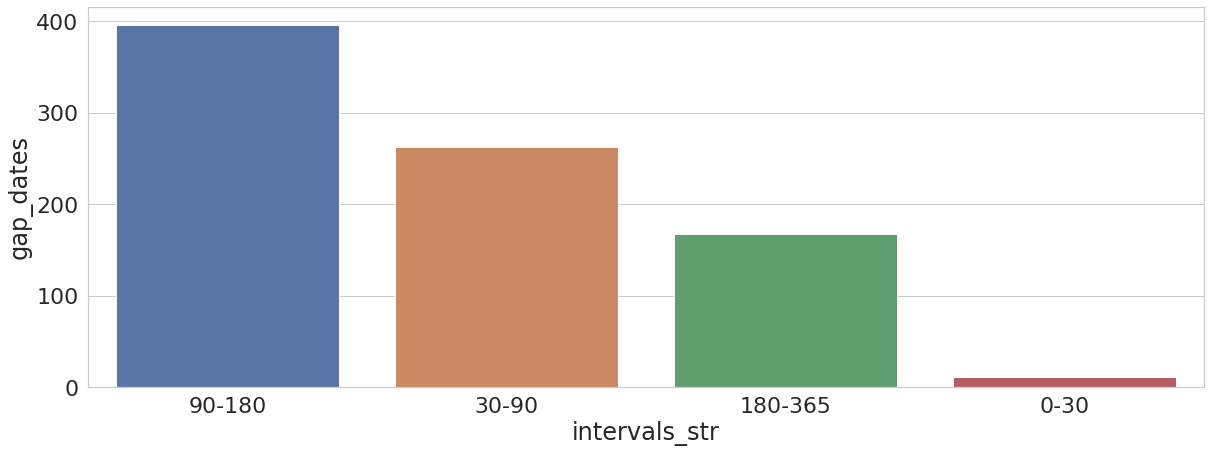

In [62]:
sns.barplot(x="intervals_str", y="gap_dates", data=df_min_dates_sort )